# Importing necessary libraries

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

# Loading the dataset

In [442]:
df = pd.read_csv('data.csv')

### Understand the Data Structure

In [443]:
df.shape

(16857, 29)

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [445]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


# Steps to follow

* Cleaning the dataset
  - Remove duplicates
  - Identify outliers
  - Check and impute null values
  - Remove outliers
* Perform Feature Engineering
    - Heatmap
    - RFE
    - chisquare test for random_variable 1 and 2
    - Multicollinearity Check: Use VIF (Variance Inflation Factor)
    - Datetime Decomposition: Extract hour, weekday, month, etc.
    - Scale/normalize if needed

Drop Duplicates

In [446]:
df.duplicated().sum()

np.int64(68)

In [447]:
df = df.drop_duplicates()
df.shape

(16789, 29)

Check for missing values

In [448]:
df.isnull().sum().sort_values(ascending=False)

,0
zone9_humidity,886
zone3_humidity,877
zone2_humidity,863
zone1_temperature,862
zone2_temperature,848
zone8_temperature,843
zone6_temperature,842
zone6_humidity,841
atmospheric_pressure,841
equipment_energy_consumption,841


Plan for imputation:

First check uniue values in object colums to filter then proceed with below steps.

- Drop rows where equipment_energy_consumption is missing
- Interpolate Time-Based Features
- Zone-Wise Sensor Data (Temperature & Humidity)

In [449]:
non_numeric_cols = df.select_dtypes(include='object').columns
print("Object-type columns:", non_numeric_cols.tolist())

Object-type columns: ['timestamp', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']


In [450]:
df['equipment_energy_consumption'].unique()

array(['60.0', '50.0', nan, '70.0', '230.0', '580.0', '430.0', '250.0',
       '100.0', '90.0', '80.0', '140.0', '120.0', '190.0', '110.0',
       '400.0', '390.0', '240.0', '40.0', '30.0', '310.0', '380.0',
       '370.0', '20.0', '-110.0', '260.0', '500.0', '450.0', '220.0',
       '170.0', '290.0', '130.0', '200.0', '210.0', '-50.0', '-20.0',
       '-944.5664110012307', '350.0', '300.0', '-400.0', '340.0', '150.0',
       '330.0', '420.0', '520.0', '360.0', '-270.0', '-30.0', '180.0',
       '550.0', '690.0', '620.0', '610.0', '490.0', '410.0', '320.0',
       '270.0', '740.0', '910.0', '510.0', '790.0', '1139.9856929495108',
       '-40.0', 'error', '460.0', '160.0', '480.0', '280.0', '-220.0',
       '560.0', '1080.0', '750.0', '???', '470.0', '440.0', '-80.0',
       '800.0', '-790.0', '540.0', '530.0', 'check', '660.0', '630.0',
       '600.0', '10.0', '570.0', '830.0', '1070.0', '890.0', '590.0',
       '-1139.9856929495108', '850.0', '710.0', '680.0', '-120.0',
       '-310.0

In [451]:
df['lighting_energy'].unique()

array(['-77.78778596503064', '30.0', '40.0', '50.0', '70.0', '60.0',
       '10.0', '20.0', nan, '-20.0', '0.0', '86.00296632575207', '???',
       '-0.0', 'error', '-10.0', '-40.0', 'check', '-30.0',
       '-86.00296632575207', 'unknown'], dtype=object)

In [452]:
df['zone1_temperature'].unique()

array(['33.74660933896648', '19.89', '19.8566666666667', '19.79',
       '19.9266666666667', '20.066666666666695', '20.1333333333333',
       '20.26', '20.4266666666667', '20.566666666666695', '20.73',
       '20.8566666666667', '20.89', '20.963333333333296',
       '21.033333333333296', '21.1', '21.1333333333333', '21.2', '21.29',
       '21.3566666666667', '21.39', '21.5', '21.533333333333296', '21.6',
       nan, '21.26', '21.1666666666667', '21.075', '21.0',
       '20.9266666666667', '20.79', '20.7', '20.6', '20.5', '20.39',
       '20.29', '20.23', '20.2', '20.1666666666667', '20.1',
       '20.033333333333296', '20.0', 'unknown', '19.823333333333295',
       '19.76', '19.7', '19.73', '19.963333333333296', '19.6333333333333',
       '19.6666666666667', '19.6', '19.533333333333296', '19.5',
       '19.4266666666667', '19.39', '19.323333333333295', '19.29', '19.2',
       '19.1', '19.033333333333296', '19.0', '18.963333333333296',
       '18.89', '18.865', '18.79', '18.856666666666

In [453]:
df['zone1_humidity'].unique()

array(['47.59666666666671', '46.69333333333329', '46.3', ...,
       '37.26333333333329', '38.323333333333295', '38.33'], dtype=object)

In [454]:
df['zone2_temperature'].unique()

array(['19.2', '19.23', '19.3566666666667', '19.4266666666667',
       '19.566666666666695', '19.73', '19.8566666666667',
       '20.033333333333296', '20.1666666666667', '20.2', nan, '20.26',
       '20.29', '20.3566666666667', '20.4266666666667', '20.5',
       '20.533333333333296', '20.6666666666667', '???', '20.7', '20.79',
       '20.89', '20.963333333333296', '21.0', '20.9266666666667',
       '20.6333333333333', '20.6', '20.39', '20.1', '20.0', '19.89',
       '19.823333333333295', '19.79', '19.76', '19.7', '19.6333333333333',
       '19.6', '19.5', '19.39', '19.29', '19.218', '19.175', '19.1',
       '19.066666666666695', '19.0222222222222', '19.033333333333296',
       '19.0', '18.963333333333296', '18.89', '18.9266666666667', '19.15',
       '19.1363636363636', '19.13', '19.0375', '19.007692307692295',
       '18.99', '18.9022222222222', '18.8566666666667', '19.245', '19.37',
       '19.0444444444444', '18.910625', '18.8081818181818', '18.79',
       '18.775', '18.7', '18.690

### Convert these columns to numeric

In [455]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [456]:
for col in non_numeric_cols.tolist()[1:]:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [457]:
df = df.dropna(subset=["equipment_energy_consumption"])

In [458]:
df = df[df['equipment_energy_consumption'] > 0]

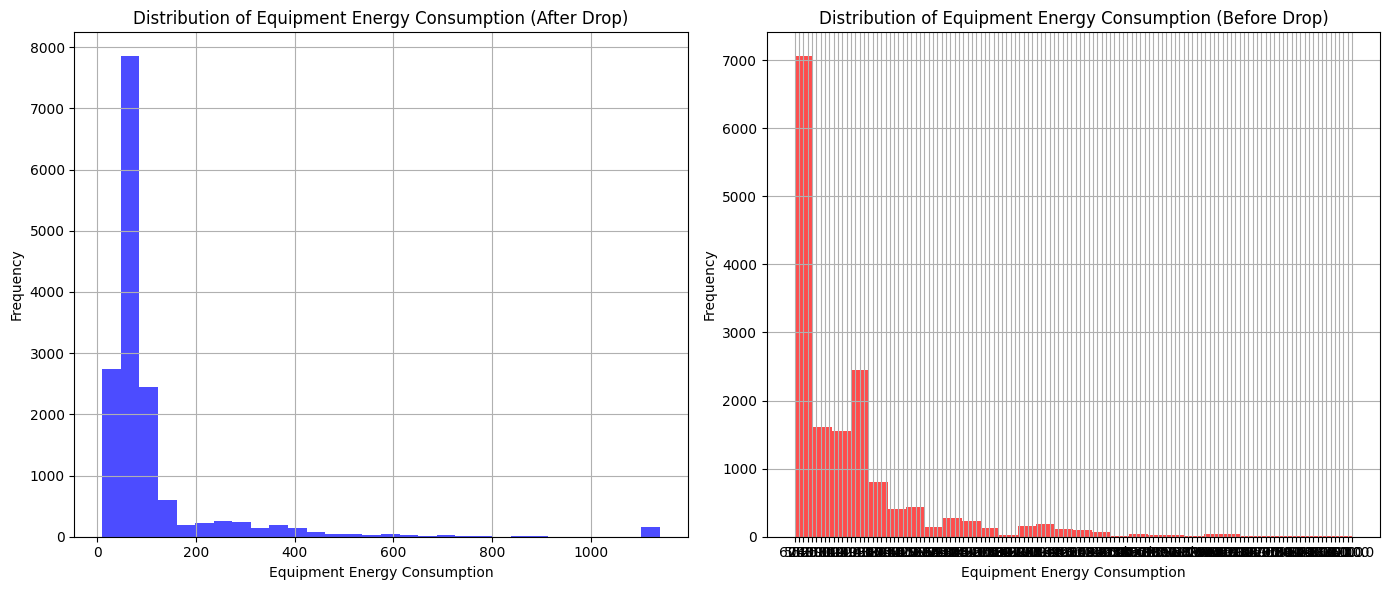

In [459]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['equipment_energy_consumption'].hist(bins=30, alpha=0.7, color='blue', label='After Dropping')
plt.title('Distribution of Equipment Energy Consumption (After Drop)')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')


df_original = pd.read_csv('data.csv')

plt.subplot(1, 2, 2)
df_original['equipment_energy_consumption'].hist(bins=30, alpha=0.7, color='red', label='Before Drop')
plt.title('Distribution of Equipment Energy Consumption (Before Drop)')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [460]:
df.shape

(15567, 29)

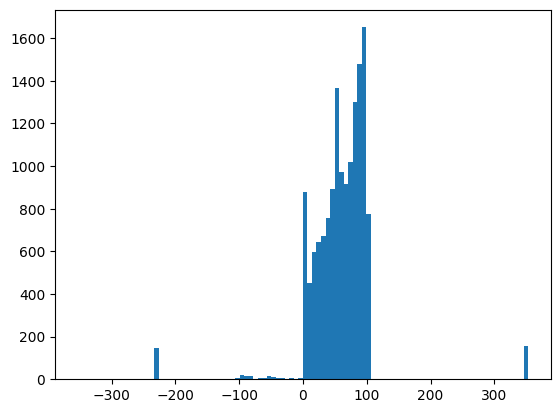

In [461]:
plt.hist(df['zone6_humidity'], bins=100);

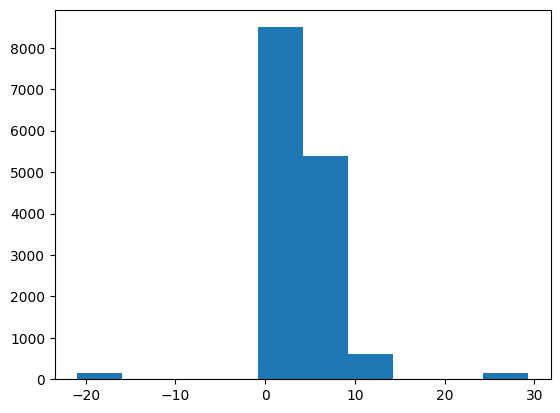

In [462]:
plt.hist(df['wind_speed']);

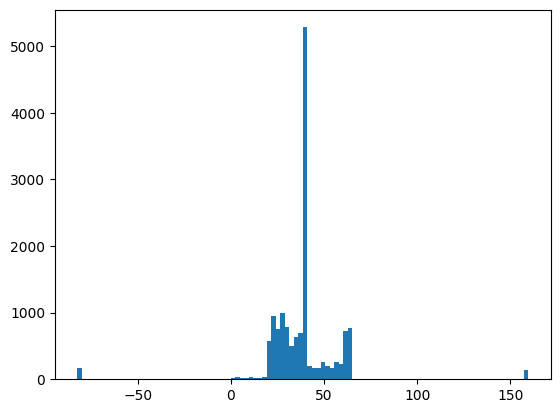

In [463]:
plt.hist(df['visibility_index'], bins=100);

In [464]:
humidity_cols = [col for col in df.columns if 'humidity' in col]
for col in humidity_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df.loc[df[col] < 0, col] = np.nan # humidity can not be negative

df.loc[df['lighting_energy']<0, 'lighting_energy'] = np.nan
df.loc[df['wind_speed']<0, 'wind_speed'] = np.nan
df.loc[df['visibility_index']<0, 'visibility_index'] = np.nan

In [465]:
df.shape

(15567, 29)

### Dataset is now cleaned.

Steps for imputation



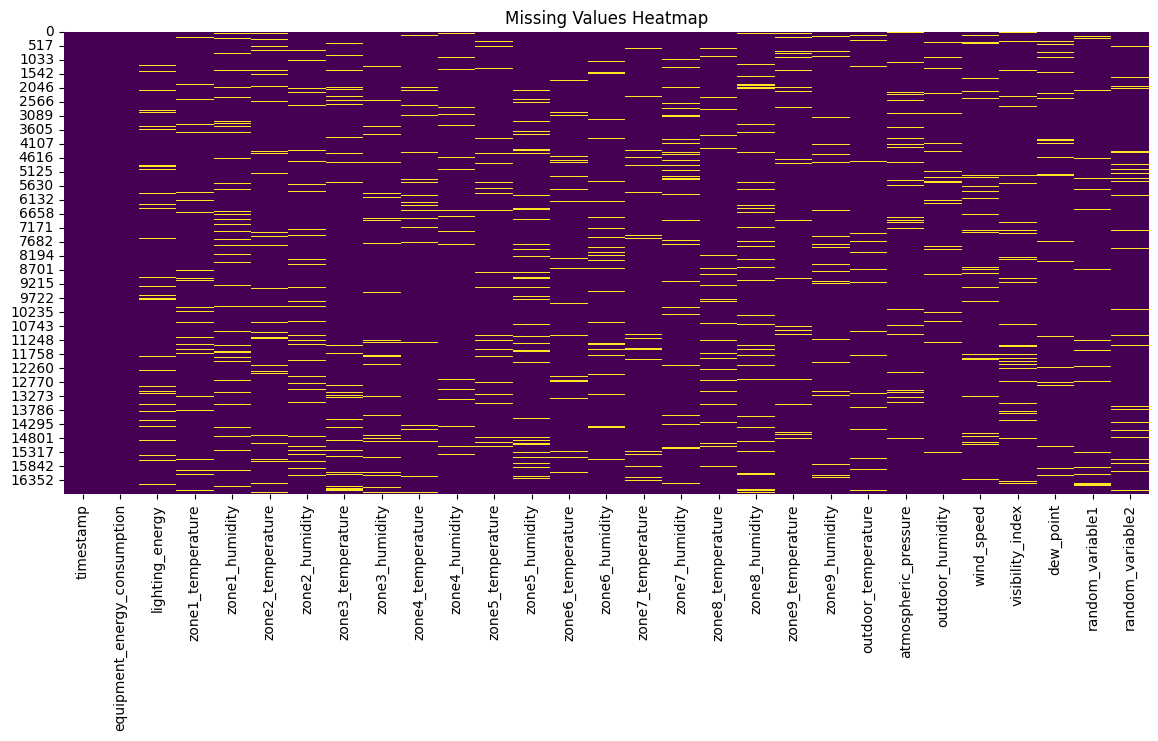

zone7_humidity          1075
zone6_humidity          1052
zone8_humidity          1033
zone4_humidity          1031
outdoor_humidity        1014
zone5_humidity          1010
lighting_energy         1000
zone9_humidity           987
zone3_humidity           984
zone1_humidity           964
zone2_humidity           928
wind_speed               920
visibility_index         913
zone1_temperature        870
zone2_temperature        853
zone6_temperature        782
zone8_temperature        781
atmospheric_pressure     781
random_variable1         771
zone5_temperature        765
random_variable2         763
zone4_temperature        753
dew_point                747
outdoor_temperature      746
zone3_temperature        741
zone7_temperature        714
zone9_temperature        709
dtype: int64


In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Count missing per column
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])


In [467]:
# df.set_index('timestamp', inplace=True)

In [468]:
# features_to_interpolate = [
#     'outdoor_temperature', 'outdoor_humidity', 'dew_point',
#     'wind_speed', 'atmospheric_pressure', 'visibility_index',
#     'lighting_energy'
# ]

# df = df.sort_values('timestamp')
# df[features_to_interpolate] = df[features_to_interpolate].interpolate(method='time')


In [469]:
cols_to_impute = df.columns.difference(['timestamp', 'equipment_energy_consumption'])

imputer = SimpleImputer(strategy='median')

df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [470]:
df.isna().sum()

,0
timestamp,0
equipment_energy_consumption,0
lighting_energy,0
zone1_temperature,0
zone1_humidity,0
zone2_temperature,0
zone2_humidity,0
zone3_temperature,0
zone3_humidity,0
zone4_temperature,0


#### Now the dataset is cleaned

- No duplicates
- No random values
- No null values

#### Let's go for outlier detection

In [471]:
df.shape

(15567, 29)

Convert timestamp to datetime features:

In [472]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['year'] = df['timestamp'].dt.year
df['is_weekend'] = df['dayofweek'].isin([5, 6])

In [473]:
df = df.drop('timestamp', axis=1)

In [474]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,visibility_index,dew_point,random_variable1,random_variable2,hour,dayofweek,month,day,year,is_weekend
0,60.0,0.0,33.746609,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,63.000000,5.300000,13.275433,13.275433,17,0,1,11,2016,False
1,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,59.166667,5.200000,18.606195,18.606195,17,0,1,11,2016,False
2,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,55.333333,5.100000,28.642668,28.642668,17,0,1,11,2016,False
3,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,51.500000,37.673716,45.410389,45.410389,17,0,1,11,2016,False
4,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,47.666667,4.900000,10.084097,10.084097,17,0,1,11,2016,False


#### Outliers detection

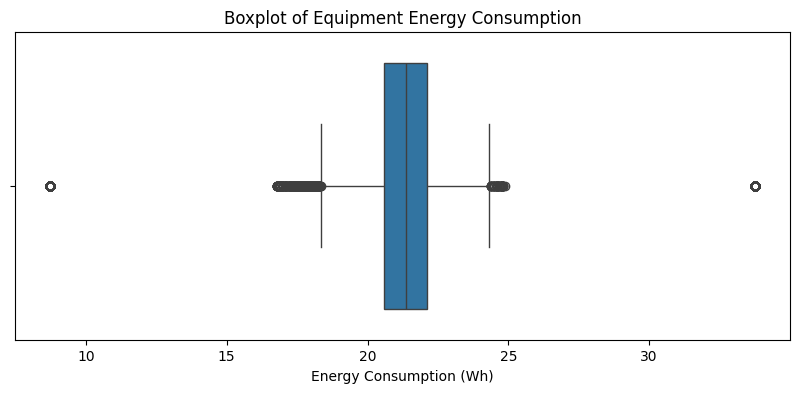

In [475]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['zone1_temperature'])
plt.title('Boxplot of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.show()


Too many outliers maybe robust scaler might work.

### Deciding between random_variable1 and random_variable2

1. Correlation with Target
2. Correlation with Each Other
3. Feature Importance
4. Variance Check (Optional)

In [476]:
df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr()


,random_variable1,random_variable2,equipment_energy_consumption
random_variable1,1.000000,0.275523,-0.014623
random_variable2,0.275523,1.000000,-0.010489
equipment_energy_consumption,-0.014623,-0.010489,1.000000


In [477]:
df[['random_variable1', 'random_variable2']].corr()


,random_variable1,random_variable2
random_variable1,1.000000,0.275523
random_variable2,0.275523,1.000000


In [478]:
X = df[['random_variable1', 'random_variable2']]
y = df['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
print(dict(zip(X.columns, importances)))

{'random_variable1': np.float64(0.4939800746285757), 'random_variable2': np.float64(0.5060199253714243)}


In [479]:
df[['random_variable1', 'random_variable2']].describe()

,random_variable1,random_variable2
count,15567.000000,15567.000000
mean,24.855704,25.154408
std,25.568920,24.919861
min,-120.170177,-120.409590
25%,12.815053,12.837692
50%,24.888670,24.907407
75%,37.276999,37.393777
max,170.156325,170.329617


## Scaling and Encoding



In [480]:
X = df.drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']


In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63, test_size=0.2)

In [482]:
X_train.head()

,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,...,visibility_index,dew_point,random_variable1,random_variable2,hour,dayofweek,month,day,year,is_weekend
7281,0.0,21.356667,40.09,19.100000,41.590000,20.60,38.59,19.290000,39.400000,19.00,...,40.000000,6.100000,1.962202,1.962202,2,2,3,2,2016,False
14443,0.0,22.500000,35.23,23.200000,31.356667,22.23,36.06,22.790000,33.642857,19.70,...,28.666667,2.766667,6.149122,6.149122,14,2,4,20,2016,False
11162,0.0,23.230000,38.29,19.600000,40.363333,23.20,38.59,20.823333,38.626667,20.20,...,38.166667,4.183333,0.893726,0.893726,22,0,3,28,2016,False
16546,0.0,22.666667,34.59,20.066667,36.590000,23.50,37.00,22.600000,32.900000,20.89,...,40.000000,1.783333,31.466173,31.466173,3,3,5,5,2016,False
15069,0.0,21.730000,35.50,18.890000,37.826667,22.50,34.20,21.236000,32.334000,20.39,...,40.000000,0.633333,28.570559,28.570559,22,6,4,24,2016,True


In [483]:
oe = OrdinalEncoder().set_output(transform="pandas")
std = StandardScaler().set_output(transform="pandas")
rbs = RobustScaler().set_output(transform="pandas")

X_train['is_weekend'] = oe.fit_transform(X_train[['is_weekend']])
X_train_std = std.fit_transform(X_train)
X_train_rbs = rbs.fit_transform(X_train)

In [484]:
X_test['is_weekend'] = oe.transform(X_test[['is_weekend']])
X_test_std = std.transform(X_test)
X_test_rbs = rbs.transform(X_test)

## Model Training

In [491]:
# lr1 = LinearRegression()

# lr1.fit(X_train_std[['random_variable1']], y_train)
# print(lr1.score(X_test_std[['random_variable1']], y_test))

# lr2 = LinearRegression()

# lr2.fit(X_train_std[['random_variable2']], y_train)
# print(lr2.score(X_test_std[['random_variable2']], y_test))

# lr3 = LinearRegression()
# lr3.fit(X_train_std[['random_variable2', 'random_variable1']], y_train)
# print(lr3.score(X_test_std[['random_variable2', 'random_variable1']], y_test))

0.0004901205860632363
-0.0002309144301824162
0.00015749017327570947


In [494]:
# X_train_std = X_train_std.drop('random_variable2', axis=1)
# X_test_std = X_test_std.drop('random_variable2', axis=1)

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.03871645553905256

In [498]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train_std, y_train)
ridge.score(X_test_std, y_test)

0.03871645313260552

In [511]:
sgd = SGDRegressor(max_iter = 3000, early_stopping=True, eta0  = 0.001, random_state = 42, alpha=0.01)

sgd.fit(X_train_std, y_train)
sgd.score(X_test_std, y_test)

0.038338105689408875

In [499]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train_std, y_train)
rf.score(X_test_std, y_test)

0.18543885200653087